# Performance comparison

## x86

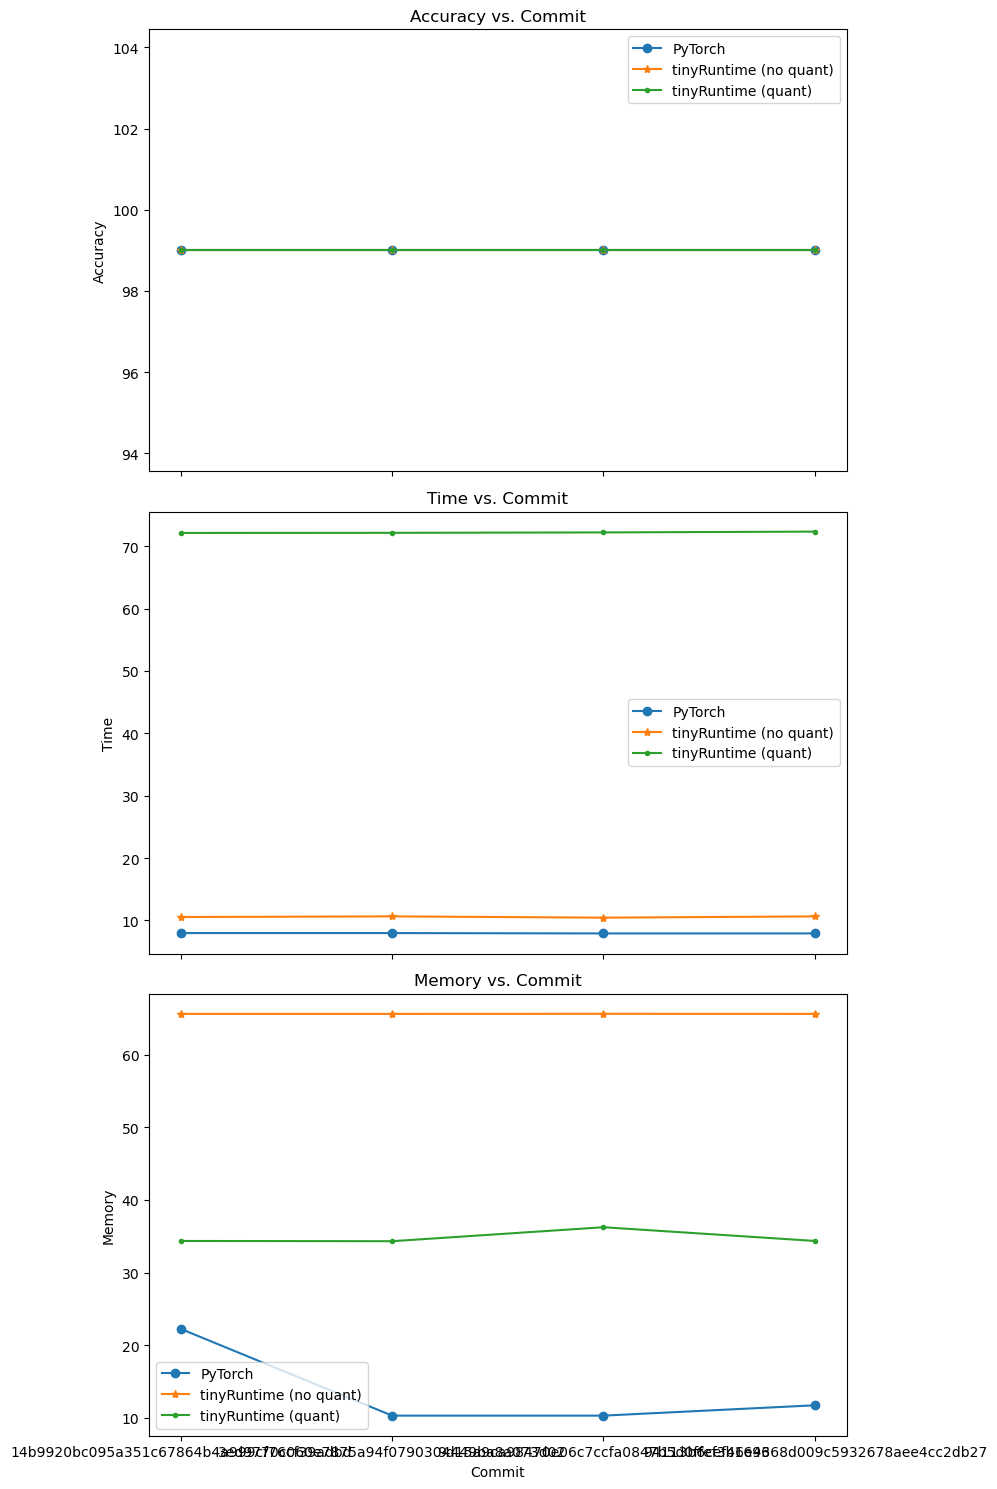

In [13]:
#| label: fig-x86
#| fig-cap: "Accuracy comparison"

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('benchmark.csv')
df = df[df["Platform"] == "x86_64"]

# Filter data for each runtime and quantization type
df_pytorch = df[df["Runtime"] == "PyTorch"]
df_trv = df[(df["Runtime"] == "tinyRuntime") & (df["Quantization"] == False)]
df_trq = df[(df["Runtime"] == "tinyRuntime") & (df["Quantization"] == True)]

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Plot Accuracy vs. Commit
axs[0].plot(df_pytorch["Commit"], df_pytorch["Accuracy"], "o-", label='PyTorch')
axs[0].plot(df_trv["Commit"], df_trv["Accuracy"], "*-", label='tinyRuntime (no quant)')
axs[0].plot(df_trq["Commit"], df_trq["Accuracy"], ".-", label='tinyRuntime (quant)')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Accuracy vs. Commit')
axs[0].legend()

# Plot Time vs. Commit
axs[1].plot(df_pytorch["Commit"], df_pytorch["Time"], "o-", label='PyTorch')
axs[1].plot(df_trv["Commit"], df_trv["Time"], "*-", label='tinyRuntime (no quant)')
axs[1].plot(df_trq["Commit"], df_trq["Time"], ".-", label='tinyRuntime (quant)')
axs[1].set_ylabel('Time')
axs[1].set_title('Time vs. Commit')
axs[1].legend()

# Plot Memory vs. Commit
axs[2].plot(df_pytorch["Commit"], df_pytorch["Max memory"], "o-", label='PyTorch')
axs[2].plot(df_trv["Commit"], df_trv["Max memory"], "*-", label='tinyRuntime (no quant)')
axs[2].plot(df_trq["Commit"], df_trq["Max memory"], ".-", label='tinyRuntime (quant)')
axs[2].set_ylabel('Memory')
axs[2].set_title('Memory vs. Commit')
axs[2].legend()

# Set common x-label
plt.xlabel('Commit')
plt.tight_layout()
plt.show()


## ARM

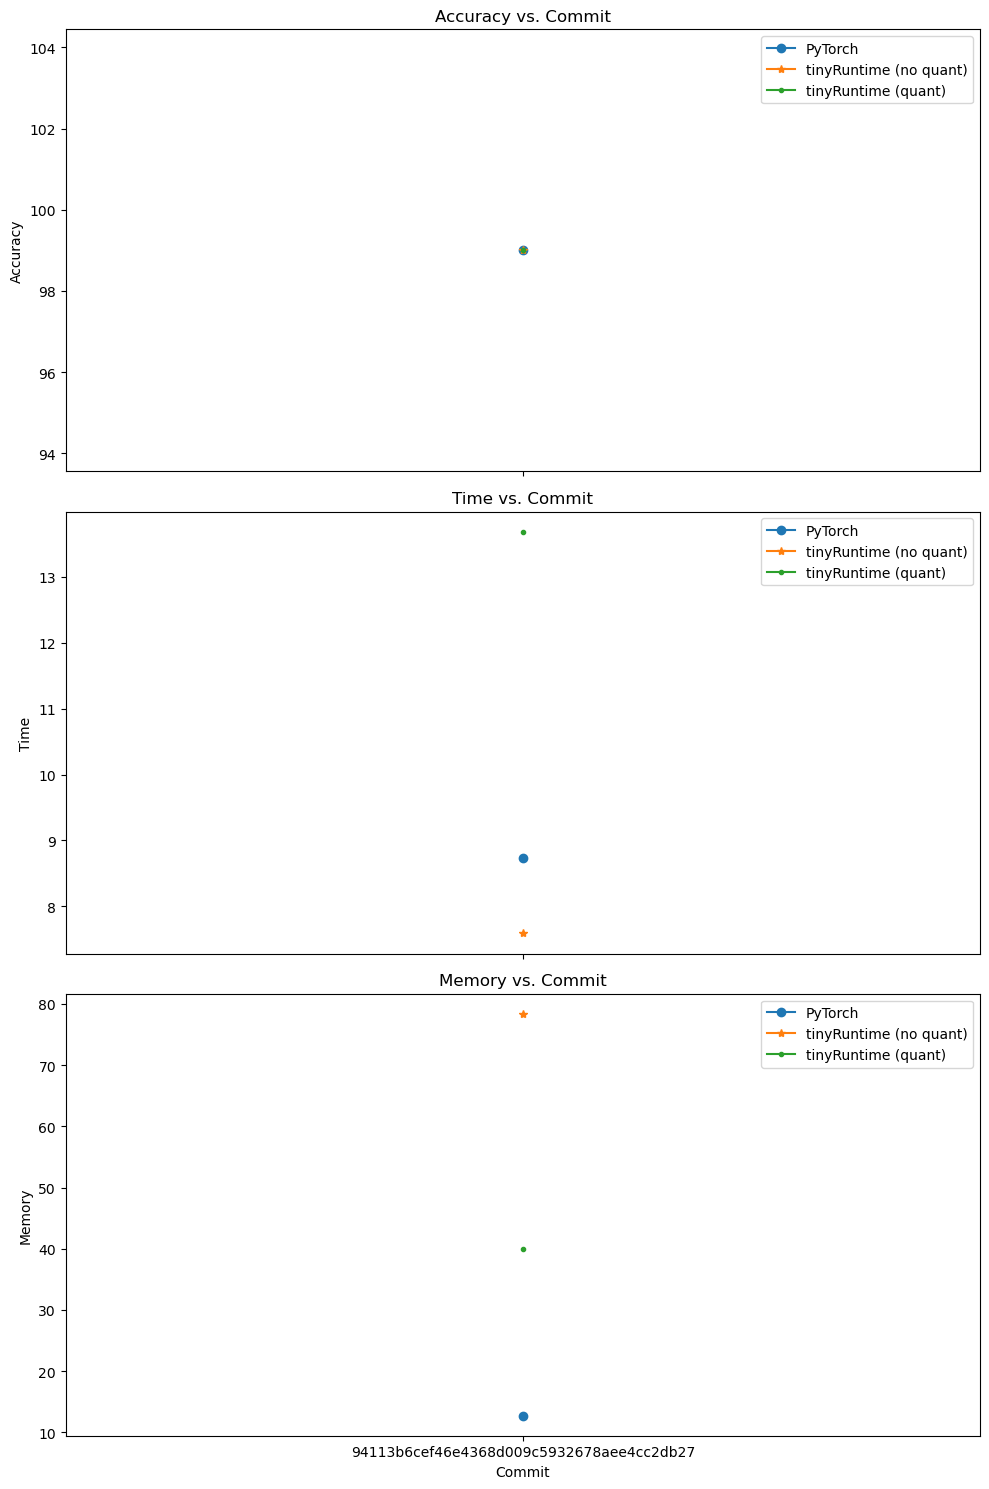

In [14]:
#| label: fig-arm
#| fig-cap: "Accuracy comparison"

# Load the data
df = pd.read_csv('benchmark.csv')
df = df[df["Platform"] == "arm64"]

# Filter data for each runtime and quantization type
df_pytorch = df[df["Runtime"] == "PyTorch"]
df_trv = df[(df["Runtime"] == "tinyRuntime") & (df["Quantization"] == False)]
df_trq = df[(df["Runtime"] == "tinyRuntime") & (df["Quantization"] == True)]

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Plot Accuracy vs. Commit
axs[0].plot(df_pytorch["Commit"], df_pytorch["Accuracy"], "o-", label='PyTorch')
axs[0].plot(df_trv["Commit"], df_trv["Accuracy"], "*-", label='tinyRuntime (no quant)')
axs[0].plot(df_trq["Commit"], df_trq["Accuracy"], ".-", label='tinyRuntime (quant)')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Accuracy vs. Commit')
axs[0].legend()

# Plot Time vs. Commit
axs[1].plot(df_pytorch["Commit"], df_pytorch["Time"], "o-", label='PyTorch')
axs[1].plot(df_trv["Commit"], df_trv["Time"], "*-", label='tinyRuntime (no quant)')
axs[1].plot(df_trq["Commit"], df_trq["Time"], ".-", label='tinyRuntime (quant)')
axs[1].set_ylabel('Time')
axs[1].set_title('Time vs. Commit')
axs[1].legend()

# Plot Memory vs. Commit
axs[2].plot(df_pytorch["Commit"], df_pytorch["Max memory"], "o-", label='PyTorch')
axs[2].plot(df_trv["Commit"], df_trv["Max memory"], "*-", label='tinyRuntime (no quant)')
axs[2].plot(df_trq["Commit"], df_trq["Max memory"], ".-", label='tinyRuntime (quant)')
axs[2].set_ylabel('Memory')
axs[2].set_title('Memory vs. Commit')
axs[2].legend()

# Set common x-label
plt.xlabel('Commit')
plt.tight_layout()
plt.show()
